**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
url = 'https://www.cryptodatadownload.com/cdd/Gemini_BTCUSD_1h.csv'
dataset = pd.read_csv(url, index_col="date", skiprows=1)
#dataset = pd.read_csv('Gemini_BTCUSD_1h.csv', index_col="date", skiprows=1)
dataset.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-04-26 00:00:00,1650931200000,BTC/USD,40443.37,40583.67,40406.77,40482.56,10.324451,4.179602e+05
2022-04-25 23:00:00,1650927600000,BTC/USD,40358.20,40580.00,40255.48,40443.37,43.346135,1.753064e+06
2022-04-25 22:00:00,1650924000000,BTC/USD,40221.10,40600.00,40144.63,40358.20,46.846300,1.890632e+06
2022-04-25 21:00:00,1650920400000,BTC/USD,40185.40,40259.09,40068.47,40221.10,25.917976,1.042449e+06
2022-04-25 20:00:00,1650916800000,BTC/USD,40237.17,40337.82,40076.64,40185.40,79.486482,3.194196e+06


**Data pre-processing**

In [ ]:
dataset = dataset.iloc[::-1]
dataset.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2015-10-08 13:00:00,1444309200,BTC/USD,0.00,245.00,0.00,245.00,0.606654,148.630323
2015-10-08 14:00:00,1444312800,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988
2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474
2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413
2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634


In [ ]:
df = dataset.reset_index()
df

,date,unix,symbol,open,high,low,close,Volume BTC,Volume USD
0,2015-10-08 13:00:00,1444309200,BTC/USD,0.00,245.00,0.00,245.00,0.606654,1.486303e+02
1,2015-10-08 14:00:00,1444312800,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1.091144e+03
2,2015-10-08 15:00:00,1444316400,BTC/USD,245.00,245.00,244.92,244.92,3.016926,7.389055e+02
3,2015-10-08 16:00:00,1444320000,BTC/USD,244.92,244.92,244.25,244.25,3.895252,9.514154e+02
4,2015-10-08 17:00:00,1444323600,BTC/USD,244.25,244.99,244.02,244.99,3.920632,9.605156e+02
...,...,...,...,...,...,...,...,...,...
57388,2022-04-25 20:00:00,1650916800000,BTC/USD,40237.17,40337.82,40076.64,40185.40,79.486482,3.194196e+06
57389,2022-04-25 21:00:00,1650920400000,BTC/USD,40185.40,40259.09,40068.47,40221.10,25.917976,1.042449e+06
57390,2022-04-25 22:00:00,1650924000000,BTC/USD,40221.10,40600.00,40144.63,40358.20,46.846300,1.890632e+06
57391,2022-04-25 23:00:00,1650927600000,BTC/USD,40358.20,40580.00,40255.48,40443.37,43.346135,1.753064e+06


In [ ]:
df = df[["open", "high", "low", "close","Volume BTC", "Volume USD"]]
#df = df[['Close']]
df.head()

,open,high,low,close,Volume BTC,Volume USD
0,0.00,245.00,0.00,245.00,0.606654,148.630323
1,245.00,245.00,244.50,245.00,4.453649,1091.143988
2,245.00,245.00,244.92,244.92,3.016926,738.905474
3,244.92,244.92,244.25,244.25,3.895252,951.415413
4,244.25,244.99,244.02,244.99,3.920632,960.515634


Text(0.5, 1.0, 'Price of Bitcoin')

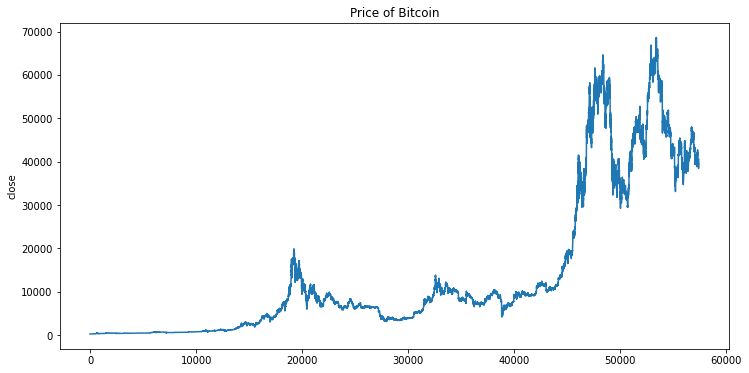

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y='close', data=df).set_title("Price of Bitcoin")

In [ ]:
SEQ_LEN = 120
FUTURE_PERIOD = 10

RATIO_TO_PREDICT = "close"

In [ ]:
times = sorted(df.index.values)  # get the times
last_10 = sorted(df.index.values)[-int(0.1*len(times))] 
last_20 = sorted(df.index.values)[-int(0.2*len(times))]

test_df = df[(df.index >= last_10)]
validation_df = df[(df.index >= last_20) & (df.index < last_10)]  
train_df = df[(df.index < last_20)] 

In [ ]:
train_ = train_df.values
valid_ = validation_df.values
test_ = test_df.values

In [ ]:
print("train shape {0}".format(train_.shape))
print("valid shape {0}".format(valid_.shape))
print("test shape {0}".format(test_.shape))

train shape (45915, 6)
valid shape (5739, 6)
test shape (5739, 6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_close = MinMaxScaler()

In [ ]:
x = train_[:,3].copy()
scale_close.fit(x.reshape(-1, 1))

MinMaxScaler()

In [ ]:
scaler.fit(train_)

train_ = scaler.transform(train_)

valid_ = scaler.transform(valid_)
test_ = scaler.transform(test_)

In [ ]:
# Now perform exponential moving average smoothing for smooth curve of data
EMA = 0.0
gamma = 0.165
for ti in range(train_.shape[0]):
    EMA = gamma*train_[ti] + (1-gamma)*EMA
    train_[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_,valid_, test_],axis=0)

**Data Splitting**

In [ ]:
def split_data(data):
    X = []
    Y = []
    for i in range(SEQ_LEN, len(data)-FUTURE_PERIOD+1):
        X.append(data[i-SEQ_LEN:i])
        Y.append(data[i+(FUTURE_PERIOD-1), 3])
    return np.array(X), np.array(Y)

In [ ]:
X_train, y_train = split_data(train_)
X_test, y_test = split_data(test_)
X_valid, y_valid = split_data(valid_)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 6))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))

In [ ]:
y_train.shape

(45786,)

In [ ]:
print("train shape {0}".format(X_train.shape))
print("valid shape {0}".format(X_valid.shape))
print("test shape {0}".format(X_test.shape))

train shape (45786, 120, 6)
valid shape (5610, 120, 6)
test shape (5610, 120, 6)


In [ ]:
X_train_2, y_train_2 = split_data(train_)
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 6))

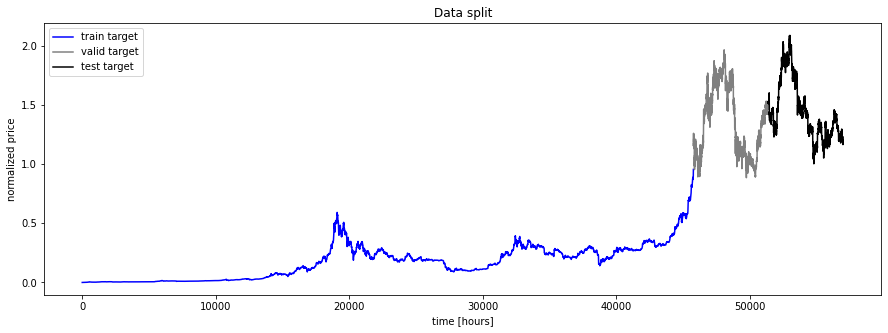

In [ ]:
## show predictions
plt.figure(figsize=(15, 5))

plt.plot(np.arange(y_train_2.shape[0]), y_train_2, color='blue', label='train target')

plt.plot(np.arange(y_train_2.shape[0], y_train_2.shape[0]+y_valid.shape[0]), y_valid,
         color='gray', label='valid target')

plt.plot(np.arange(y_train_2.shape[0]+y_valid.shape[0],
                   y_train_2.shape[0]+y_valid.shape[0]+y_test.shape[0]),
         y_test, color='black', label='test target')


plt.title('Data split')
plt.xlabel('time [hours]')
plt.ylabel('normalized price')
plt.legend(loc='best');

**LSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization

# Initialize the RNN
model_LSTM1 = Sequential()
model_LSTM1.add(LSTM(units = 120, input_shape=(120, 6)))
model_LSTM1.add(LeakyReLU(alpha=0.5))
model_LSTM1.add(Dropout(0.5))
model_LSTM1.add(BatchNormalization())
model_LSTM1.add(Dense(1))
model_LSTM1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120)               60960     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 120)               0         
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 batch_normalization (BatchN  (None, 120)              480       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 61,561
Trainable params: 61,321
Non-trainable params: 240
__________________________________________________

In [ ]:
model_LSTM1.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [ ]:
history_LSTM1 = model_LSTM1.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
358/358 [==============================] - 22s 43ms/step - loss: 0.0199 - MAPE: 277.8822 - val_loss: 0.8877 - val_MAPE: 67.1022
Epoch 2/10
358/358 [==============================] - 15s 41ms/step - loss: 0.0010 - MAPE: 108.6758 - val_loss: 0.0533 - val_MAPE: 16.5346
Epoch 3/10
358/358 [==============================] - 15s 41ms/step - loss: 7.7303e-04 - MAPE: 98.2912 - val_loss: 0.0027 - val_MAPE: 3.1139
Epoch 4/10
358/358 [==============================] - 15s 41ms/step - loss: 7.1098e-04 - MAPE: 96.5274 - val_loss: 0.0077 - val_MAPE: 5.0052
Epoch 5/10
358/358 [==============================] - 15s 41ms/step - loss: 6.7676e-04 - MAPE: 94.4505 - val_loss: 0.0031 - val_MAPE: 3.2563
Epoch 6/10
358/358 [==============================] - 15s 42ms/step - loss: 6.8099e-04 - MAPE: 98.8815 - val_loss: 0.0117 - val_MAPE: 7.0096
Epoch 7/10
358/358 [==============================] - 15s 41ms/step - loss: 6.3993e-04 - MAPE: 95.6691 - val_loss: 0.0026 - val_MAPE: 2.8542
Epoch 8/10
358/35

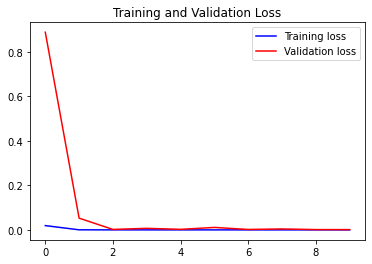

In [ ]:
loss = history_LSTM1.history['loss']
val_loss = history_LSTM1.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

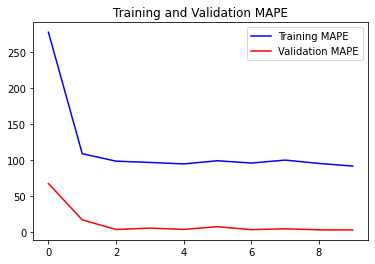

In [ ]:
mape = history_LSTM1.history['MAPE']
val_mape = history_LSTM1.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_LSTM1 = model_LSTM1.predict(X_test)

In [ ]:
pred_LSTM1.shape

(5610, 1)

In [ ]:
y_valid.shape

(5610,)

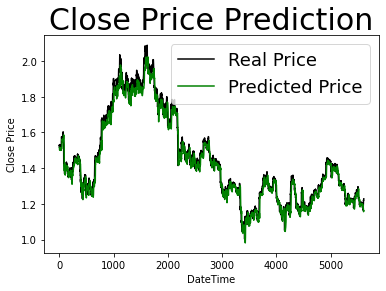

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM1, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

LSTM1_loss = model_LSTM1.evaluate(X_test, y_test, verbose=1)

#Err_LSTM1 = LSTM1_loss[0]
#Err_LSTM1 = math.sqrt(LSTM1_loss)
print('\nThe error of the model with 1 layer LSTM is:',LSTM1_loss)

176/176 [==============================] - 2s 12ms/step - loss: 0.0014 - MAPE: 1.8482

The error of the model with 1 layer LSTM is: [0.0014003176474943757, 1.8482402563095093]


**GRU Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras.utils import np_utils
from keras.layers import GRU,CuDNNGRU
model_GRU = Sequential()

model_GRU.add(GRU(units=50, input_shape=(120,6),return_sequences=False))
model_GRU.add(Activation('tanh'))
model_GRU.add(Dropout(0.3))
model_GRU.add(Dense(1))
model_GRU.add(Activation('relu'))
model_GRU.compile(loss='mse', optimizer='adam', metrics = ('MAPE'))
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8700      
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 8,751
Trainable params: 8,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_GRU = model_GRU.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = 128, epochs = 10)

Epoch 1/10
358/358 [==============================] - 13s 29ms/step - loss: 0.0014 - MAPE: 48.5664 - val_loss: 0.0059 - val_MAPE: 4.2762
Epoch 2/10
358/358 [==============================] - 11s 30ms/step - loss: 3.9277e-04 - MAPE: 27.1454 - val_loss: 0.0067 - val_MAPE: 4.7763
Epoch 3/10
358/358 [==============================] - 10s 28ms/step - loss: 2.9673e-04 - MAPE: 27.2905 - val_loss: 0.0022 - val_MAPE: 2.6319
Epoch 4/10
358/358 [==============================] - 10s 28ms/step - loss: 2.4156e-04 - MAPE: 31.6698 - val_loss: 0.0078 - val_MAPE: 5.3024
Epoch 5/10
358/358 [==============================] - 10s 28ms/step - loss: 2.2131e-04 - MAPE: 34.8103 - val_loss: 0.0032 - val_MAPE: 3.2095
Epoch 6/10
358/358 [==============================] - 10s 28ms/step - loss: 1.9740e-04 - MAPE: 35.8987 - val_loss: 0.0028 - val_MAPE: 3.0289
Epoch 7/10
358/358 [==============================] - 10s 27ms/step - loss: 1.9882e-04 - MAPE: 37.5932 - val_loss: 0.0018 - val_MAPE: 2.4009
Epoch 8/10
358/35

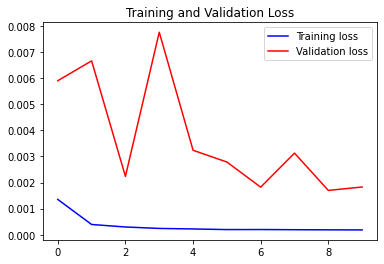

In [ ]:
loss_GRU = history_GRU.history['loss']
val_loss_GRU = history_GRU.history['val_loss']

epochs = range(len(loss_GRU))

plt.figure()

plt.plot(epochs, loss_GRU, 'b', label='Training loss')
plt.plot(epochs, val_loss_GRU, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

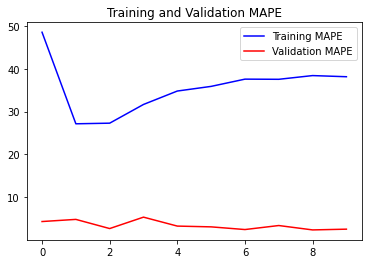

In [ ]:
mape = history_GRU.history['MAPE']
val_mape = history_GRU.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_GRU = model_GRU.predict(X_test)

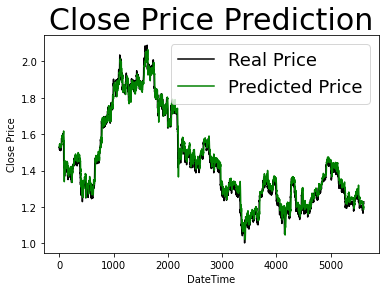

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_GRU, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

GRU_loss = model_GRU.evaluate(X_test, y_test, verbose=1)

#Err_GRU = math.sqrt(GRU_loss)
print('\nThe error of the model with a GRU layer is:',GRU_loss)

176/176 [==============================] - 2s 11ms/step - loss: 0.0014 - MAPE: 2.0236

The error of the model with a GRU layer is: [0.0013630205066874623, 2.0235655307769775]


**CNN-LSTM Model**

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization


model_LSTM2  =  Sequential() 
model_LSTM2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 6)))
model_LSTM2.add(tf.keras.layers.AveragePooling1D(4))
model_LSTM2.add(LSTM(units=120,  input_shape=(120, 6)))
model_LSTM2.add(LeakyReLU(alpha=0.5)) 
model_LSTM2.add(BatchNormalization())
model_LSTM2.add(Dropout(0.5))
#model_LSTM2.add(Dense(64, activation='relu'))
#model_LSTM2.add(BatchNormalization())
#model_LSTM2.add(Dropout(0.1))
model_LSTM2.add(Dense(1,activation='linear'))
model_LSTM2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 118, 120)          2280      
                                                                 
 average_pooling1d (AverageP  (None, 29, 120)          0         
 ooling1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 120)               115680    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 120)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 120)              480       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 120)              

In [ ]:
model_LSTM2.compile(optimizer='adam', loss='mean_squared_error', metrics = ('MAPE'))

In [ ]:
history_LSTM2 = model_LSTM2.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=10, batch_size=128)

Epoch 1/10
358/358 [==============================] - 17s 20ms/step - loss: 0.0162 - MAPE: 273.1315 - val_loss: 0.9883 - val_MAPE: 70.5841
Epoch 2/10
358/358 [==============================] - 6s 17ms/step - loss: 9.0324e-04 - MAPE: 93.2036 - val_loss: 0.0997 - val_MAPE: 21.8318
Epoch 3/10
358/358 [==============================] - 6s 17ms/step - loss: 7.5938e-04 - MAPE: 87.5853 - val_loss: 0.0032 - val_MAPE: 3.2318
Epoch 4/10
358/358 [==============================] - 6s 17ms/step - loss: 7.3422e-04 - MAPE: 91.5117 - val_loss: 0.0068 - val_MAPE: 4.9931
Epoch 5/10
358/358 [==============================] - 6s 17ms/step - loss: 6.7893e-04 - MAPE: 92.2495 - val_loss: 0.0037 - val_MAPE: 3.5490
Epoch 6/10
358/358 [==============================] - 6s 17ms/step - loss: 6.7267e-04 - MAPE: 93.9025 - val_loss: 0.0034 - val_MAPE: 3.4128
Epoch 7/10
358/358 [==============================] - 6s 17ms/step - loss: 6.4573e-04 - MAPE: 90.5461 - val_loss: 0.0026 - val_MAPE: 2.8758
Epoch 8/10
358/358 [

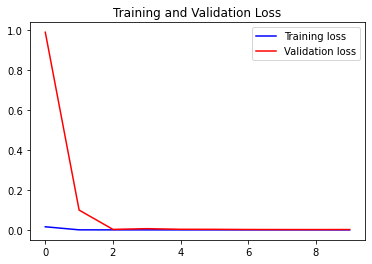

In [ ]:
loss_LSTM2 = history_LSTM2.history['loss']
val_loss_LSTM2 = history_LSTM2.history['val_loss']

epochs = range(len(loss_LSTM2))

plt.figure()

plt.plot(epochs, loss_LSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_LSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

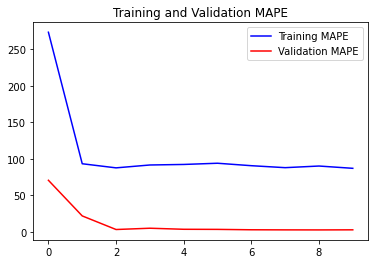

In [ ]:
mape = history_LSTM2.history['MAPE']
val_mape = history_LSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
X_test.shape

(5610, 120, 6)

In [ ]:
pred_LSTM2 = model_LSTM2.predict(X_test)

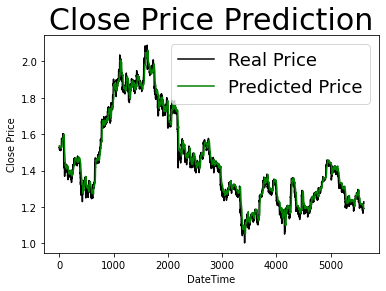

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_LSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

LSTM2_loss = model_LSTM2.evaluate(X_test, y_test, verbose=1)

#Err_LSTM2 = math.sqrt(LSTM2_loss)
print('\nThe error of the model with a Conv1D and an LSTM layer is:',LSTM2_loss)

176/176 [==============================] - 1s 6ms/step - loss: 0.0016 - MAPE: 2.0033

The error of the model with a Conv1D and an LSTM layer is: [0.0015742587856948376, 2.0033280849456787]


**CNN-BiLSTM Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize the RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
regressor2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 6)))
regressor2.add(tf.keras.layers.AveragePooling1D(4))
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 6))))
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))


In [ ]:
# Compiling the RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))
regressor2.summary()

# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 118, 120)          2280      
                                                                 
 average_pooling1d_1 (Averag  (None, 29, 120)          0         
 ePooling1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              254976    
 l)                                                              
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

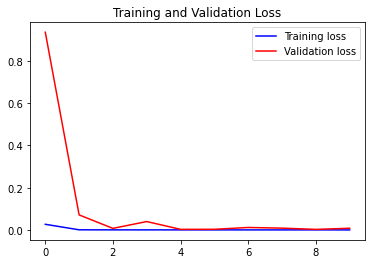

In [ ]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

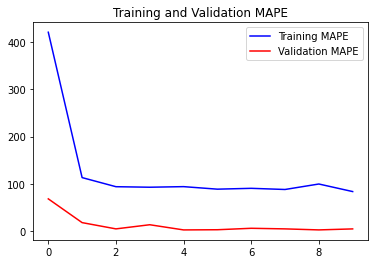

In [ ]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_BiLSTM2 = regressor2.predict(X_test)

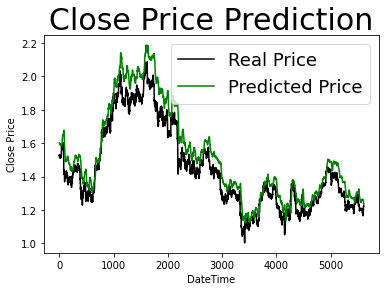

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)

#Err_BiLSTM2 = math.sqrt(BiLSTM2_loss)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

176/176 [==============================] - 1s 8ms/step - loss: 0.0091 - MAPE: 5.5359

The error of the model with 1 layer BiLSTM is: [0.009056000970304012, 5.535891532897949]


**Bi-LSTM**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout, BatchNormalization
from keras.layers import Bidirectional

num_units = 128
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 128
num_epochs = 10

# Initialize the RNN
regressor2 = Sequential()

# Adding the input layer and the LSTM layer
#regressor2.add(tf.keras.layers.Conv1D(120, 3, activation="relu",input_shape=(120, 5)))
#regressor2.add(tf.keras.layers.AveragePooling1D(4))
regressor2.add(Bidirectional(LSTM(units = num_units, input_shape=(120, 6))))#activation = activation_function,
regressor2.add(LeakyReLU(alpha= 0.5))
regressor2.add(BatchNormalization())
regressor2.add(Dropout(0.5))
# Adding the output layer
regressor2.add(Dense(units = 1))
# Compiling the RNN
regressor2.compile(optimizer = optimizer, loss = loss_function, metrics = ('MAPE'))



In [ ]:

#regressor2.summary()
# Using the training set to train the model
history_BiLSTM2 = regressor2.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size = batch_size, epochs = num_epochs)

Epoch 1/10
358/358 [==============================] - 10s 19ms/step - loss: 0.0337 - MAPE: 564.1741 - val_loss: 0.9858 - val_MAPE: 70.3305
Epoch 2/10
358/358 [==============================] - 6s 17ms/step - loss: 0.0013 - MAPE: 123.1517 - val_loss: 0.1661 - val_MAPE: 28.1346
Epoch 3/10
358/358 [==============================] - 6s 16ms/step - loss: 8.4503e-04 - MAPE: 99.4235 - val_loss: 0.0085 - val_MAPE: 4.8211
Epoch 4/10
358/358 [==============================] - 6s 16ms/step - loss: 7.7810e-04 - MAPE: 95.7752 - val_loss: 0.0070 - val_MAPE: 4.3007
Epoch 5/10
358/358 [==============================] - 6s 17ms/step - loss: 7.1533e-04 - MAPE: 95.8564 - val_loss: 0.0083 - val_MAPE: 5.3561
Epoch 6/10
358/358 [==============================] - 6s 17ms/step - loss: 6.5117e-04 - MAPE: 93.1445 - val_loss: 0.0030 - val_MAPE: 2.9907
Epoch 7/10
358/358 [==============================] - 6s 16ms/step - loss: 6.4338e-04 - MAPE: 90.0405 - val_loss: 0.0026 - val_MAPE: 2.8425
Epoch 8/10
358/358 [===

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              138240    
 nal)                                                            
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 139,521
Trainable params: 139,009
Non-tr

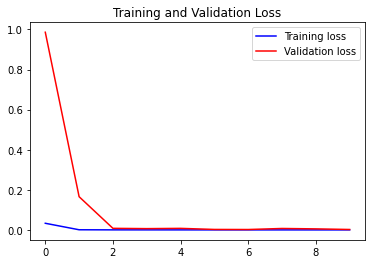

In [ ]:
loss_BiLSTM2 = history_BiLSTM2.history['loss']
val_loss_BiLSTM2 = history_BiLSTM2.history['val_loss']

epochs = range(len(loss_BiLSTM2))

plt.figure()

plt.plot(epochs, loss_BiLSTM2, 'b', label='Training loss')
plt.plot(epochs, val_loss_BiLSTM2, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

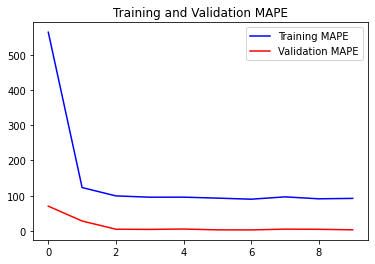

In [ ]:
mape = history_BiLSTM2.history['MAPE']
val_mape = history_BiLSTM2.history['val_MAPE']

epochs = range(len(mape))

plt.figure()

plt.plot(epochs, mape, 'b', label='Training MAPE')
plt.plot(epochs, val_mape, 'r', label='Validation MAPE')
plt.title("Training and Validation MAPE")
plt.legend()

plt.show()

In [ ]:
pred_BiLSTM2 = regressor2.predict(X_test)

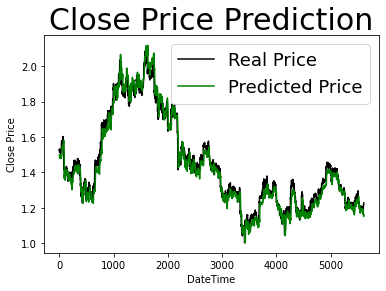

In [ ]:
plt.plot(y_test, color = 'black', label = 'Real Price')
plt.plot(pred_BiLSTM2, color = 'green', label = 'Predicted Price')
plt.title('Close Price Prediction', fontsize=30)
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('DateTime')
plt.ylabel('Close Price')
plt.legend(fontsize=18)
plt.show()

In [ ]:
import math

BiLSTM2_loss = regressor2.evaluate(X_test, y_test, verbose=1)

#Err_BiLSTM2 = math.sqrt(BiLSTM2_loss)
print('\nThe error of the model with 1 layer BiLSTM is:',BiLSTM2_loss)

176/176 [==============================] - 1s 7ms/step - loss: 0.0018 - MAPE: 2.3012

The error of the model with 1 layer BiLSTM is: [0.0018174207070842385, 2.3012380599975586]
